In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import yaml
import os

In [2]:
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

In [3]:
DATA_PATH = "../" + config["data"]["dataset_path"]

In [5]:
# Load dataset
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}")

df = pd.read_csv(DATA_PATH)
df = df.set_index("hsi_id")
print(f"Data shape: {df.shape}")

Data shape: (500, 449)


In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
hsi_id,,,,,,,,,,,,,,,,,,,,,
imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [7]:
# Summary statistics
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [8]:
# Check missing values
missing_values = df.isnull().sum().sum()
print(f"Total Missing Values: {missing_values}")

Total Missing Values: 0


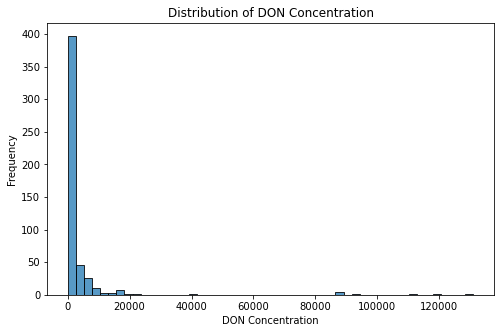

In [10]:
# Distribution of DON concentration
plt.figure(figsize=(8, 5))
sns.histplot(df["vomitoxin_ppb"], bins=50)
plt.title("Distribution of DON Concentration")
plt.xlabel("DON Concentration")
plt.ylabel("Frequency")
plt.show()

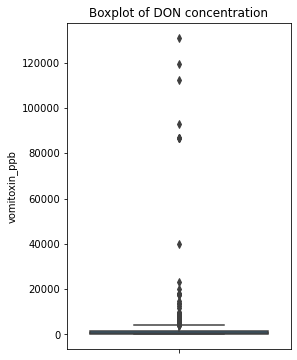

In [12]:
# Checking outliers
plt.figure(figsize=(4,6))
sns.boxplot(y=df.iloc[:, -1])
plt.title("Boxplot of DON concentration")
plt.show()

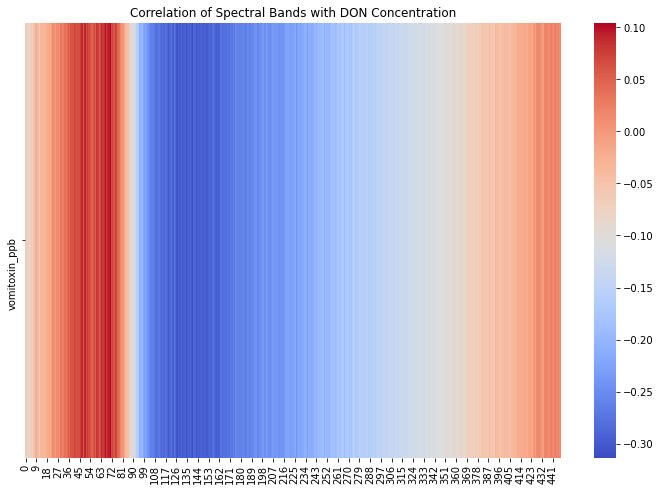

In [13]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.iloc[-1:, :-1], cmap="coolwarm", annot=False)
plt.title("Correlation of Spectral Bands with DON Concentration")
plt.show()

In [14]:
# Normalize reflectance data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])

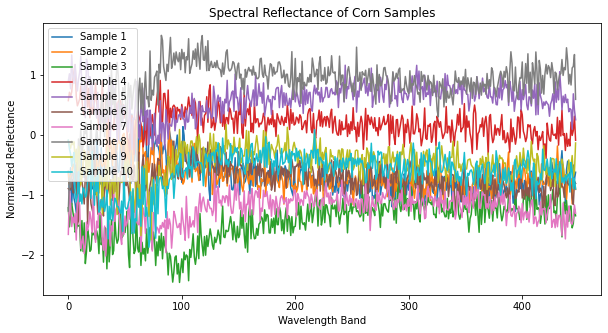

In [15]:
# Plot spectral reflectance for some samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(range(X_scaled.shape[1]), X_scaled[i], label=f'Sample {i+1}')
plt.xlabel("Wavelength Band")
plt.ylabel("Normalized Reflectance")
plt.title("Spectral Reflectance of Corn Samples")
plt.legend()
plt.show()

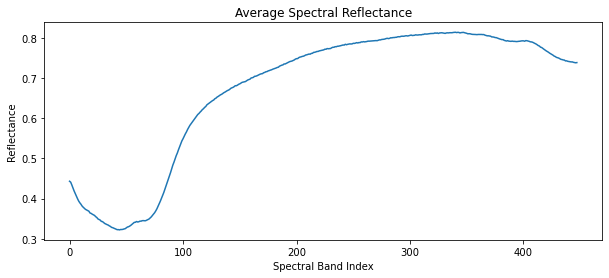

In [11]:
# Plot average spectral reflectance
X = df.iloc[:, :-1].values
average_spectrum = np.mean(X, axis=0)
plt.figure(figsize=(10,4))
plt.plot(average_spectrum)
plt.title("Average Spectral Reflectance")
plt.xlabel("Spectral Band Index")
plt.ylabel("Reflectance")
plt.show()